<h2>Primer Inciso<h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

/tmp/ipykernel_3162/1607809514.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import random
for i in range(10):
    num = random.random()
    H_0 = 0.5*(1+math.erf(num))
    print(f'EL número x es:{round(num,2)} y su valor en erf es:{round(H_0,5)}')
    

EL número x es:0.75 y su valor en erf es:0.85558
EL número x es:0.9 y su valor en erf es:0.89913
EL número x es:0.32 y su valor en erf es:0.67272
EL número x es:0.07 y su valor en erf es:0.54094
EL número x es:0.64 y su valor en erf es:0.81677
EL número x es:0.86 y su valor en erf es:0.88893
EL número x es:0.17 y su valor en erf es:0.59627
EL número x es:0.01 y su valor en erf es:0.5061
EL número x es:0.97 y su valor en erf es:0.91416
EL número x es:0.68 y su valor en erf es:0.83289


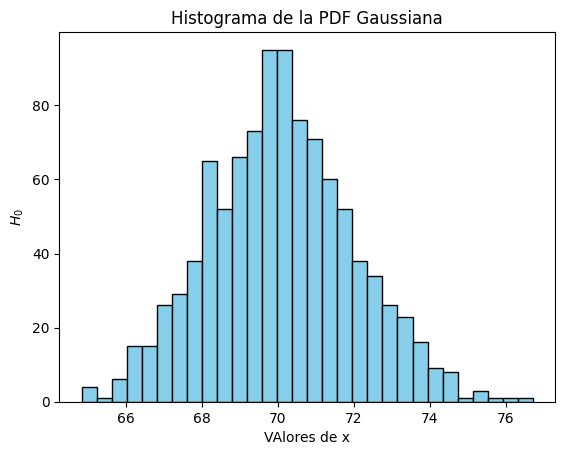

In [123]:
H0Arr = np.random.normal(70, 2, 1000)
 
plt.hist(H0Arr, bins=30, color='skyblue', edgecolor='black')
 
plt.xlabel('VAlores de x')
plt.ylabel('$H_0$')
plt.title('Histograma de la PDF Gaussiana')
plt.show()

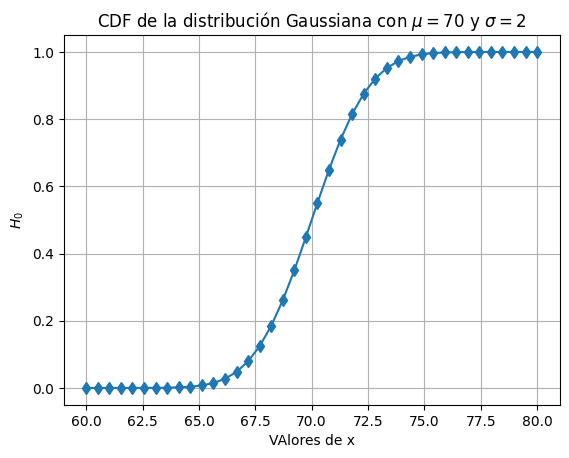

In [4]:
nsample = 40
low=60.0
high=80.0
zSampl = np.random.uniform(low, high, size=(nsample,))
zArr = np.linspace(low, high, nsample)
h0,h0_Aux=[],[]
for i in range(len(zSampl)):
    h0.append(0.5*(math.erf((zSampl[i]-70)/(2*math.sqrt(2)))+1))
    h0_Aux.append(0.5*(math.erf((zArr[i]-70)/(2*math.sqrt(2)))+1))
    
plt.plot(zArr,h0_Aux,'d-')
plt.grid()
plt.xlabel('VAlores de x')
plt.ylabel('$H_0$')
plt.title('CDF de la distribución Gaussiana con $\mu = 70$ y $\sigma=2$')
plt.show()

<h1>Segundo Inciso<h1>

Para las distribuciones mencionadas, encuentre la CDF, el valor esperado y la desviasión estandar. Grafique la función PDF y CDF, para diferentes valores de $\mu$ y $\sigma$. Use un generador de números aleatórios para la función PDF y compare la función CDF usando la función de Python correspondientes.
<ul>
  <li>Binomial</li>
  <li>Poisson</li>
  <li> $&chi;^2$</li>
</ul>

<h3>Comparación entre la función CDF binomial de python y la función creada<h3>

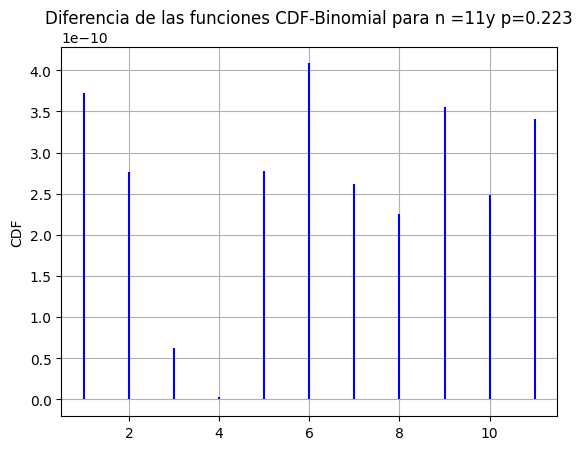

In [122]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
def fact(n):  
    fa=1
    for i in range(1, n+1):
        fa *= i
    return fa
def combinatoria(n,k):
    C = 1
    C = fact(n)/((fact(k))*(fact(n-k)))
    return C
def customBinomialCDF(k, n, p):
    sum = 0
    for i in range(0,k):sum += combinatoria(n,i)*(p**i)*((1-p)**(n-i))
    return round(sum,9)

n = random.randint(2, 20) 
p = random.uniform(0, 1)

xAxis,yAxis=[],[]
for i in range(1,n):
    xAxis.append(i)
    yAxis.append(abs(binom.cdf(i-1, i, p) - customBinomialCDF(i,i,p) ))
plt.vlines(xAxis, 0, yAxis, label='axvline - full height', colors ="b")
plt.title('Diferencia de las funciones CDF-Binomial para n =' + str(n-1)+ 'y p='+str(round(p,3)))
plt.ylabel('CDF')
plt.grid()




<h3>Comparación entre la función CDF de Poisson de python y la función creada<h3>

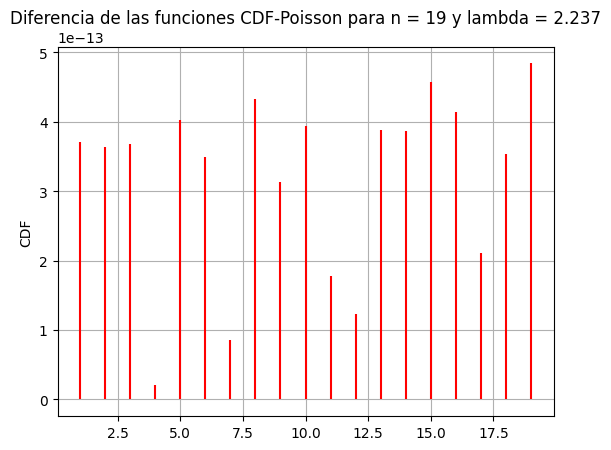

In [121]:
import scipy
def fact(n):  
    fa=1
    for i in range(1, n+1): fa *= i
    return fa

def customPoissonCDF(k,lam):
    sum = 0
    for i in range(0,k+1):sum += (math.exp(-lam))*(lam**(i))/(fact(i))
    return round(sum,12)

n = random.randint(2, 20) 
lam = random.uniform(0, 10)

xAxis,yAxis=[],[]
for i in range(1,n):
    xAxis.append(i)
    yAxis.append(abs( scipy.stats.poisson.cdf(i,lam) - customPoissonCDF(i,lam)))
plt.vlines(xAxis, 0, yAxis, label='axvline - full height', colors ="r")
plt.title('Diferencia de las funciones CDF-Poisson para n = ' + str(n-1)+ ' y lambda = '+str(round(lam,3)))
plt.ylabel('CDF')
plt.grid()

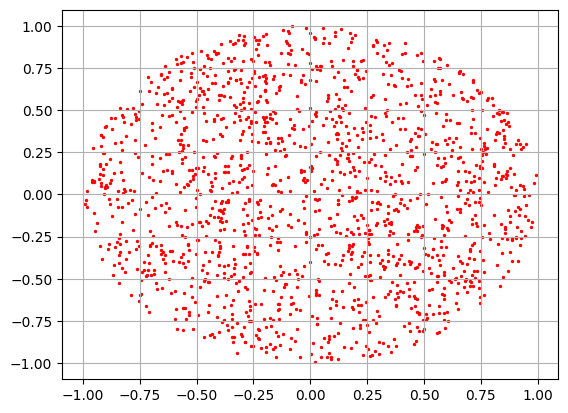

In [147]:
import random
N = 2000
xPoints,yPoints = [],[]
for i in range(N):
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    r2 = (x**2) + (y**2) 
    if (r2)**0.5<=1:
        xPoints.append(x)
        yPoints.append(y)
        


plt.scatter(xPoints, yPoints,color='r', sizes = [2])
plt.grid()
plt.show()  # or plt.savefig("name.png")  




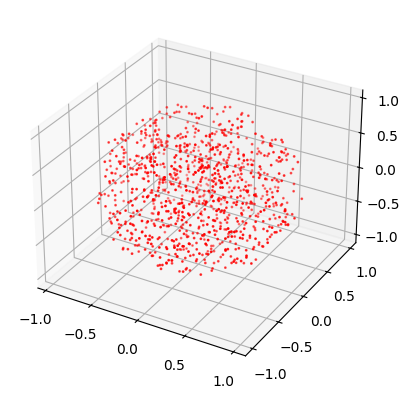

In [148]:
import random
fig = plt.figure()
ax = plt.axes(projection ='3d')
N = 2000
xPoints,yPoints, zPoints = [],[],[]
for i in range(N):
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    z = random.uniform(-1, 1)
    r2 = (x**2) + (y**2) + (z**2)
    if (r2)**0.5<=1:
        xPoints.append(x)
        yPoints.append(y)
        zPoints.append(z)
        
ax.scatter3D(xPoints, yPoints, zPoints, color='r', sizes = [1])
plt.show()